Original Data: [1, 2, 3, 8, 9, 10, 15, 16, 17]
Cluster 1: [15, 16, 17]
Cluster 2: [1, 2, 3, 8, 9, 10]


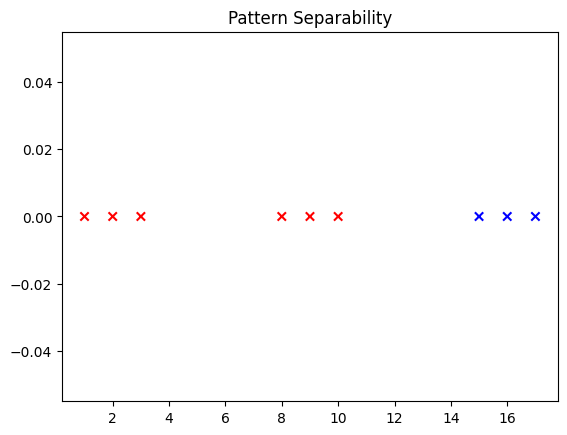

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def analyze_patterns(data):
    data = np.array(data).reshape(-1, 1)
    labels = GaussianMixture(n_components=2).fit_predict(data)

    clusters = [
        [data[i, 0] for i in range(len(data)) if labels[i] == label]
        for label in range(2)
    ]

    return clusters

input_data = [1, 2, 3, 8, 9, 10, 15, 16, 17]
cluster_1, cluster_2 = analyze_patterns(input_data)

print("Original Data:", input_data)
print("Cluster 1:", cluster_1)
print("Cluster 2:", cluster_2)

plt.scatter(
    input_data,
    np.zeros_like(input_data),
    c=["blue" if x in cluster_1 else "red" for x in input_data],
    marker="x",
)
plt.title("Pattern Separability")
plt.show()